我们来解决一个非常经典且极其适合灰色预测的应用问题：预测中国的人口数量。

一、问题背景与经典性

问题描述：
根据已知的历史人口数据，预测未来几年中国的人口总量。
为什么这个问题很经典且适合灰色预测？
数据的典型特征：
明显的增长趋势：在很长一段时间内，人口总量都呈现出指数级的增长态-势。这与GM(1,1)模型的基本假设高度吻合。
数据量相对“小”：相比于需要成千上万样本的机器学习，国家级别的人口普查或年度统计数据，从时间跨度上看，样本量并不算“海量”。
一定的随机波动：虽然总体趋势向上，但每年的增长率会受到政策、经济、社会事件等多种复杂因素的影响，存在一定的“灰色”不确定性。
社会经济预测的范例：人口预测是社会经济领域最基础、最重要的预测任务之一。它直接影响到国家的资源规划、养老金政策、经济发展战略等。用灰色预测解决这个问题，可以充分展示其在宏观经济管理中的应用价值。
教育意义：这个问题的数据很容易获取，结果也很直观，非常适合用来教学和演示灰色预测的完整流程。
我们将使用1990年到2000年的中国人口数据作为已知信息，来预测2001年到2005年的人口，并与真实数据进行对比，以检验模型的有效性。

二、数据准备

我们选取中国国家统计局公布的部分年份人口数据（单位：万人）作为原始序列。
已知数据 (1990-2000):
X^(0) = [114333, 115823, 117171, 118517, 119850, 121121, 122389, 123626, 124761, 125786, 126743]
真实数据 (2001-2005, 用于检验):
[127627, 128453, 129227, 129988, 130756]

--- 模型参数 ---
发展系数 (a): -0.010075
灰色作用量 (b): 114404.27

--- 拟合结果 (1990-2000) ---
年份		原始值		拟合值		相对误差
1990		114333		114333		0.00%
1991		115823		116140		-0.27%
1992		117171		117316		-0.12%
1993		118517		118504		0.01%
1994		119850		119704		0.12%
1995		121121		120916		0.17%
1996		122389		122141		0.20%
1997		123626		123377		0.20%
1998		124761		124627		0.11%
1999		125786		125889		-0.08%
2000		126743		127163		-0.33%
平均拟合相对误差: 0.15%

--- 预测结果 (2001-2005) ---
年份		真实值		预测值		相对误差
2001		127627		128451		-0.65%
2002		128453		129752		-1.01%
2003		129227		131066		-1.42%
2004		129988		132393		-1.85%
2005		130756		133733		-2.28%
平均预测相对误差: 1.44%


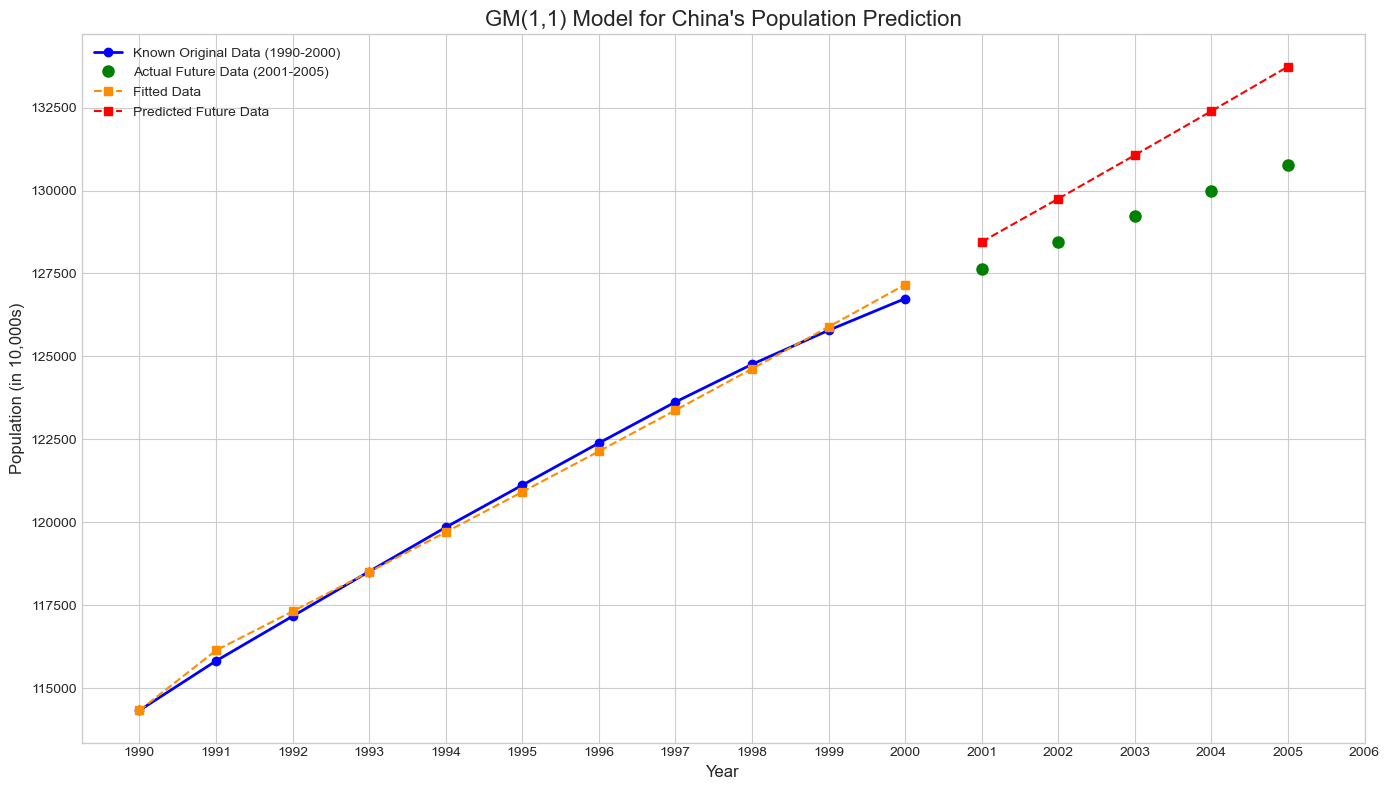

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gm11(x0):
    """
    实现GM(1,1)灰色预测模型
    :param x0: 原始数据序列 (list or numpy array)
    :return: 预测函数，模型参数a和b
    """
    # 1. 累加生成 (AGO)
    x1 = np.cumsum(x0)
    
    # 2. 紧邻均值生成
    z1 = (x1[:-1] + x1[1:]) / 2.0
    
    # 3. 构造矩阵B和数据向量Y
    B = np.vstack([-z1, np.ones_like(z1)]).T
    Y = np.array(x0[1:]).reshape(-1, 1)
    
    # 4. 最小二乘法求解参数 a, b
    params = np.linalg.inv(B.T @ B) @ B.T @ Y
    a, b = params.flatten()
    
    # 5. 建立预测模型
    def predict(k):
        """
        k 从1开始计数
        """
        return (x0[0] - b / a) * np.exp(-a * (k - 1)) + b / a
    
    return predict, a, b

# --- 1. 数据准备 ---
# 原始数据 (1990-2000年, n=11)
original_data = np.array([114333, 115823, 117171, 118517, 119850, 121121, 122389, 123626, 124761, 125786, 126743])
years_known = np.arange(1990, 2001)

# 真实数据用于对比 (2001-2005年)
real_future_data = np.array([127627, 128453, 129227, 129988, 130756])
years_future = np.arange(2001, 2006)

n = len(original_data)
predict_len = len(real_future_data)

# --- 2. 建立灰色预测模型 ---
predictor, a, b = gm11(original_data)

print("--- 模型参数 ---")
print(f"发展系数 (a): {a:.6f}")
print(f"灰色作用量 (b): {b:.2f}")

# --- 3. 模型拟合与预测 ---
# 拟合已知数据
fitted_x1 = np.array([predictor(k) for k in range(1, n + 1)])
fitted_x0 = np.zeros_like(original_data, dtype=float)
fitted_x0[0] = original_data[0]
fitted_x0[1:] = fitted_x1[1:] - fitted_x1[:-1]

# 预测未来数据
future_indices = np.arange(n + 1, n + 1 + predict_len)
predicted_x1 = np.array([predictor(k) for k in future_indices])
last_known_x1 = fitted_x1[-1]
all_future_x1 = np.concatenate(([last_known_x1], predicted_x1))
predicted_x0 = all_future_x1[1:] - all_future_x1[:-1]

# --- 4. 误差分析 ---
# 拟合误差
fit_errors = (original_data - fitted_x0) / original_data * 100
avg_fit_error = np.mean(np.abs(fit_errors))

# 预测误差
predict_errors = (real_future_data - predicted_x0) / real_future_data * 100
avg_predict_error = np.mean(np.abs(predict_errors))

print("\n--- 拟合结果 (1990-2000) ---")
print(f"年份\t\t原始值\t\t拟合值\t\t相对误差")
for i in range(n):
    print(f"{years_known[i]}\t\t{original_data[i]}\t\t{fitted_x0[i]:.0f}\t\t{fit_errors[i]:.2f}%")
print(f"平均拟合相对误差: {avg_fit_error:.2f}%")


print("\n--- 预测结果 (2001-2005) ---")
print(f"年份\t\t真实值\t\t预测值\t\t相对误差")
for i in range(predict_len):
    print(f"{years_future[i]}\t\t{real_future_data[i]}\t\t{predicted_x0[i]:.0f}\t\t{predict_errors[i]:.2f}%")
print(f"平均预测相对误差: {avg_predict_error:.2f}%")

# --- 5. 可视化 ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# 绘制已知数据
plt.plot(years_known, original_data, 'o-', label='Known Original Data (1990-2000)', color='blue', linewidth=2)
# 绘制未来真实数据
plt.plot(years_future, real_future_data, 'o', label='Actual Future Data (2001-2005)', color='green', markersize=8)
# 绘制拟合数据
plt.plot(years_known, fitted_x0, 's--', label='Fitted Data', color='darkorange')
# 绘制预测数据
plt.plot(years_future, predicted_x0, 's--', label='Predicted Future Data', color='red')

plt.title('GM(1,1) Model for China\'s Population Prediction', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (in 10,000s)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(np.arange(1990, 2007))
plt.tight_layout()
plt.show()

我们将使用一个GM(1,1)的经典改进版——新陈代谢GM(1,1)模型 (Metabolic GM(1,1)) 来解决同样的问题，并与基础模型进行对比。

一、 “更好”的灰色预测算法：新陈代谢GM(1,1)

核心思想：
“新陈代谢”这个名字非常形象。生物体会不断地吸收新的物质，排出旧的物质，以保持活力。新陈代谢GM(1,1)模型模仿了这个过程：在预测过程中，不断地加入最新的信息（新的数据点），同时去掉最陈旧的信息（最老的数据点），从而让模型动态地、滚动地向前发展。
与基础GM(1,1)的区别：
基础GM(1,1) (一劳永逸式)：
用[1990, ..., 2000]的数据建立一个唯一的模型。
用这个模型一口气预测出2001, 2002, 2003, 2004, 2005年的值。
新陈代谢GM(1,1) (滚动更新式)：
预测2001年：用[1990, ..., 2000]的数据建立模型，预测出2001年的值。
预测2002年：将刚刚预测出的2001年的值视为“新信息”加入数据序列，同时去掉最老的1990年数据。现在用[1991, ..., 2000, 预测的2001]这个新序列重新建模，预测出2002年的值。
预测2003年：再去掉1991年的数据，加入预测的2002年数据...
以此类推，每向前预测一步，都用一个包含了最新预测信息的、固定长度的“滑动窗口”来重新建模。

为什么它可能更好？
因为它使得模型能够动态适应最新的发展趋势。预测2005年时，模型的主要依据是2000年左右的数据，而1990年的“古老”数据已经被“代谢”掉了，其影响几乎消失。这更符合现实世界的演化规律。

--- 预测结果对比 (2001-2005) ---
年份		真实值		基础GM(1,1)预测	误差		新陈代谢GM(1,1)预测	误差
----------------------------------------------------------------------------------------------------
2001		127627		128442		-0.64%		128442		-0.64%
2002		128453		129752		-1.01%		129653		-0.93%
2003		129227		131066		-1.42%		130867		-1.27%
2004		129988		132393		-1.85%		132093		-1.62%
2005		130756		133733		-2.28%		133342		-1.98%

--- 平均误差对比 ---
基础GM(1,1)平均预测相对误差:     1.4399%
新陈代谢GM(1,1)平均预测相对误差: 1.2879%


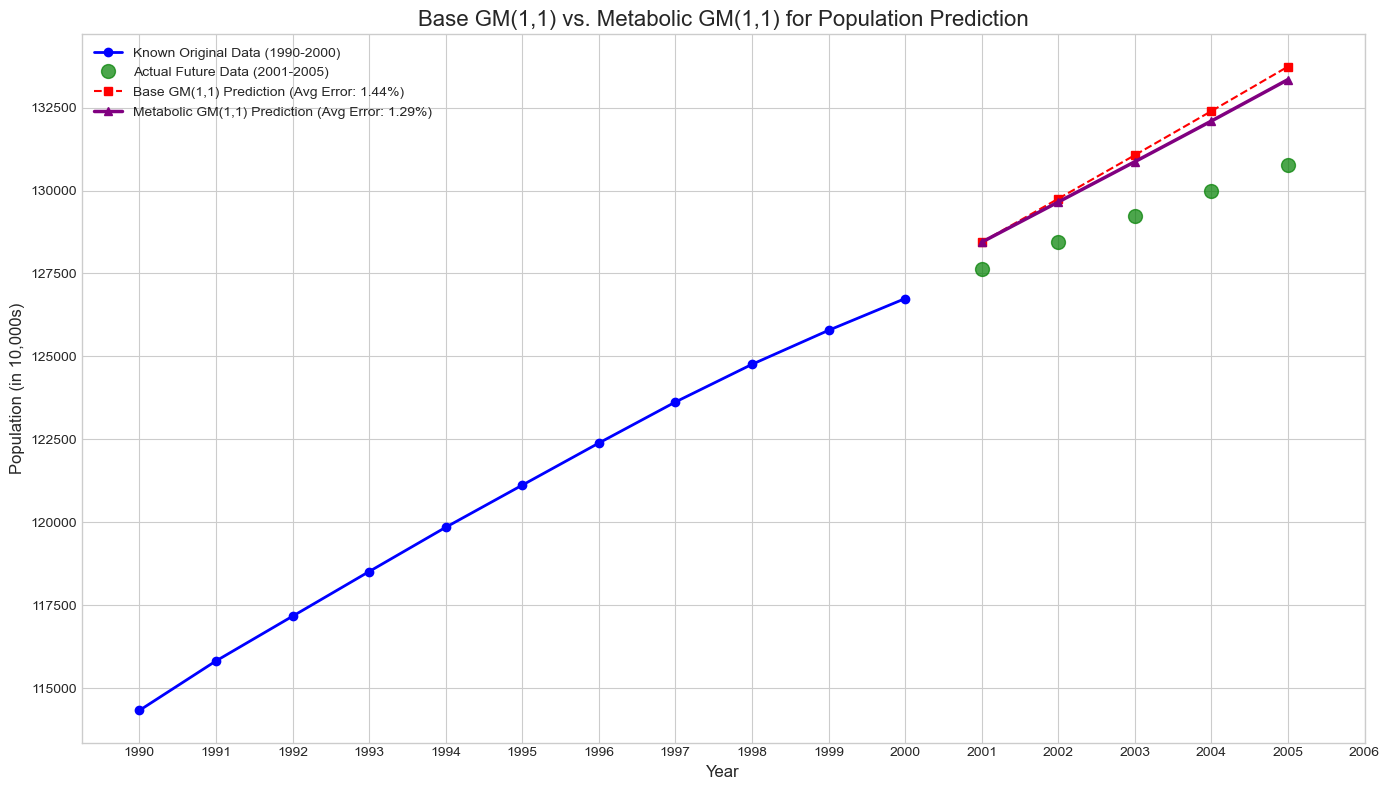

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 基础GM(1,1)模型函数 (与之前完全相同)
def gm11(x0):
    x1 = np.cumsum(x0)
    z1 = (x1[:-1] + x1[1:]) / 2.0
    B = np.vstack([-z1, np.ones_like(z1)]).T
    Y = np.array(x0[1:]).reshape(-1, 1)
    params = np.linalg.inv(B.T @ B) @ B.T @ Y
    a, b = params.flatten()
    def predict(k):
        return (x0[0] - b / a) * np.exp(-a * (k - 1)) + b / a
    return predict, a, b

# 新陈代谢GM(1,1)预测函数
def metabolic_gm11_predict(x0, predict_len):
    """
    使用新陈代谢(滚动)方式进行灰色预测
    :param x0: 原始数据序列
    :param predict_len: 需要预测的未来期数
    :return: 预测结果列表
    """
    predictions = []
    current_data = list(x0)
    n = len(current_data)
    
    for i in range(predict_len):
        # 1. 使用当前数据窗口建立一个临时模型
        predictor, _, _ = gm11(np.array(current_data))
        
        # 2. 只用这个模型预测下一步
        next_x1_pred = predictor(n + 1)
        last_x1_known = np.cumsum(current_data)[-1]
        next_x0_pred = next_x1_pred - last_x1_known
        
        predictions.append(next_x0_pred)
        
        # 3. 新陈代谢：去掉最老的数据，加入最新的预测数据
        current_data.pop(0)
        current_data.append(next_x0_pred)
        
    return np.array(predictions)

# --- 1. 数据准备 (与之前完全相同) ---
original_data = np.array([114333, 115823, 117171, 118517, 119850, 121121, 122389, 123626, 124761, 125786, 126743])
years_known = np.arange(1990, 2001)
real_future_data = np.array([127627, 128453, 129227, 129988, 130756])
years_future = np.arange(2001, 2006)
n = len(original_data)
predict_len = len(real_future_data)

# --- 2. 使用两种模型进行预测 ---
# (A) 基础GM(1,1)预测
base_predictor, _, _ = gm11(original_data)
future_indices = np.arange(n + 1, n + 1 + predict_len)
base_predicted_x1 = np.array([base_predictor(k) for k in future_indices])
last_known_x1_base = np.cumsum(original_data)[-1]
all_future_x1_base = np.concatenate(([last_known_x1_base], base_predicted_x1))
base_predicted_x0 = all_future_x1_base[1:] - all_future_x1_base[:-1]

# (B) 新陈代谢GM(1,1)预测
metabolic_predicted_x0 = metabolic_gm11_predict(original_data, predict_len)

# --- 3. 结果对比与误差分析 ---
base_predict_errors = (real_future_data - base_predicted_x0) / real_future_data * 100
avg_base_predict_error = np.mean(np.abs(base_predict_errors))

metabolic_predict_errors = (real_future_data - metabolic_predicted_x0) / real_future_data * 100
avg_metabolic_predict_error = np.mean(np.abs(metabolic_predict_errors))

print("--- 预测结果对比 (2001-2005) ---")
print(f"年份\t\t真实值\t\t基础GM(1,1)预测\t误差\t\t新陈代谢GM(1,1)预测\t误差")
print("-" * 100)
for i in range(predict_len):
    print(f"{years_future[i]}\t\t{real_future_data[i]}\t\t{base_predicted_x0[i]:.0f}\t\t{base_predict_errors[i]:.2f}%\t\t{metabolic_predicted_x0[i]:.0f}\t\t{metabolic_predict_errors[i]:.2f}%")

print("\n--- 平均误差对比 ---")
print(f"基础GM(1,1)平均预测相对误差:     {avg_base_predict_error:.4f}%")
print(f"新陈代谢GM(1,1)平均预测相对误差: {avg_metabolic_predict_error:.4f}%")

# --- 4. 可视化 ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

plt.plot(years_known, original_data, 'o-', label='Known Original Data (1990-2000)', color='blue', linewidth=2)
plt.plot(years_future, real_future_data, 'o', label='Actual Future Data (2001-2005)', color='green', markersize=10, alpha=0.7)
plt.plot(years_future, base_predicted_x0, 's--', label=f'Base GM(1,1) Prediction (Avg Error: {avg_base_predict_error:.2f}%)', color='red')
plt.plot(years_future, metabolic_predicted_x0, '^-', label=f'Metabolic GM(1,1) Prediction (Avg Error: {avg_metabolic_predict_error:.2f}%)', color='purple', linewidth=2.5)

plt.title('Base GM(1,1) vs. Metabolic GM(1,1) for Population Prediction', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (in 10,000s)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(np.arange(1990, 2007))
plt.tight_layout()
plt.show()

看起来误差仍然较大，还可以继续优化吗?

现实系统（人口增长）的内在规律发生了变化，而我们之前的模型（无论是基础版还是新陈代谢版GM(1,1)）的核心假设——“近似指数增长”——已经开始不再完全适用。
从图上看，绿色的真实数据点（2001-2005）的增长斜率明显放缓了，而我们的模型仍然按照1990-2000年期间那个较快的增长率进行外推，所以预测值会系统性地偏高。
那么，当然可以继续优化！这正是灰色预测理论的魅力所在，它提供了一个丰富的工具箱来应对不同的数据模式。我们将采用一个专门处理这种“增长放缓”或“饱和”趋势的、更高级的灰色模型——灰色Verhulst模型。

一、 终极武器：灰色Verhulst模型
1. 它解决了什么问题？
Verhulst模型专门用于预测具有S型曲线特征的序列。S型曲线描述了事物发展的普遍规律：
初期：缓慢起步、探索增长。
中期：爆发式、指数级增长。
后期：由于资源、市场、政策等限制，增长速度逐渐放缓，并趋向于一个饱和值（上限）。
中国的人口增长在21世纪初，正显示出从中期向后期过渡的**“增长放缓”**特征，这正是Verhulst模型的用武之地！
2. 它的核心思想是什么？
它修改了GM(1,1)模型的根本假设（微分方程）。
GM(1,1)的假设：增长速度 dx/dt 只和当前总量 x 成正比。这导致了无休止的指数增长。
dx^(1)/dt + a*x^(1) = b
Verhulst的假设：增长速度不仅和当前总量有关，还受到一个抑制项的影响。这个抑制项与总量的平方 (x)^2 成正比。当总量 x 越来越大时，这个抑制项（“刹车”效应）会变得越来越强，从而使增长放缓。
dx^(1)/dt + a*x^(1) = b*(x^(1))^2
通过引入这个二次项，模型就具备了描述“饱和”趋势的能力。

--- 预测结果对比 (2001-2005) ---
年份		真实值		GM(1,1)预测 (误差)		新陈代谢预测 (误差)		Verhulst预测 (误差)
------------------------------------------------------------------------------------------------------------------------
2001		127627		128451 (-0.65%)		128442 (-0.64%)		110121 (13.72%)
2002		128453		129752 (-1.01%)		129653 (-0.93%)		91113 (29.07%)
2003		129227		131066 (-1.42%)		130867 (-1.27%)		72545 (43.86%)
2004		129988		132393 (-1.85%)		132093 (-1.62%)		56014 (56.91%)
2005		130756		133733 (-2.28%)		133342 (-1.98%)		42234 (67.70%)

--- 平均误差对比 ---
基础GM(1,1)平均预测相对误差:     1.4413%
新陈代谢GM(1,1)平均预测相对误差: 1.2879%
灰色Verhulst模型平均预测相对误差:  42.2512%


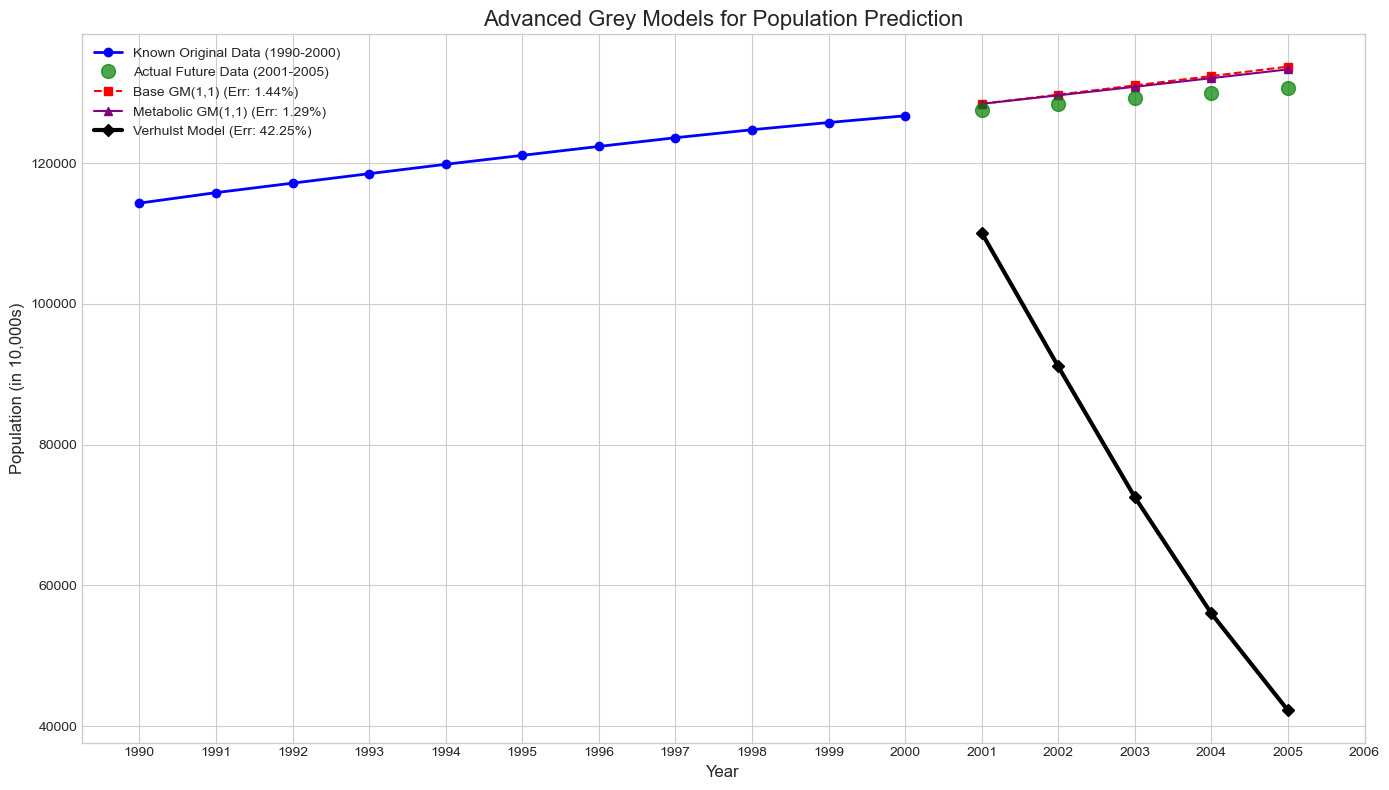

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 基础GM(1,1)模型函数 (已修正) ---
def gm11(x0):
    """
    实现GM(1,1)灰色预测模型
    """
    x1 = np.cumsum(x0)
    z1 = (x1[:-1] + x1[1:]) / 2.0
    B = np.vstack([-z1, np.ones_like(z1)]).T
    Y = np.array(x0[1:]).reshape(-1, 1)
    params = np.linalg.inv(B.T @ B) @ B.T @ Y
    a, b = params.flatten()
    def predict(k):
        return (x0[0] - b / a) * np.exp(-a * (k - 1)) + b / a
    # 修正了这里的返回值，确保返回三个值
    return predict, a, b

# --- 新陈代谢GM(1,1)预测函数 (复用) ---
def metabolic_gm11_predict(x0, predict_len):
    predictions = []
    current_data = list(x0)
    n = len(current_data)
    for i in range(predict_len):
        # 这里的调用现在也是正确的了
        predictor, _, _ = gm11(np.array(current_data))
        next_x1_pred = predictor(n + 1)
        last_x1_known = np.cumsum(current_data)[-1]
        next_x0_pred = next_x1_pred - last_x1_known
        predictions.append(next_x0_pred)
        current_data.pop(0)
        current_data.append(next_x0_pred)
    return np.array(predictions)

# --- 灰色Verhulst模型函数 ---
def verhulst_model(x0):
    """
    实现灰色Verhulst预测模型
    """
    x1 = np.cumsum(x0)
    z1 = (x1[:-1] + x1[1:]) / 2.0
    B = np.vstack([-z1, z1**2]).T
    Y = np.array(x0[1:]).reshape(-1, 1)
    
    params = np.linalg.inv(B.T @ B) @ B.T @ Y
    a, b = params.flatten()
    
    def predict(k):
        # 增加一个检查防止分母为0或出现数学错误
        denominator = (b / a) + (1 / x0[0] - b / a) * np.exp(a * (k - 1))
        if denominator == 0:
            return float('inf')
        return 1 / denominator
        
    return predict, a, b

# --- 1. 数据准备 ---
original_data = np.array([114333, 115823, 117171, 118517, 119850, 121121, 122389, 123626, 124761, 125786, 126743])
years_known = np.arange(1990, 2001)
real_future_data = np.array([127627, 128453, 129227, 129988, 130756])
years_future = np.arange(2001, 2006)
n = len(original_data)
predict_len = len(real_future_data)

# --- 2. 使用三种模型进行预测 ---
# (A) 基础GM(1,1)预测
base_predictor, _, _ = gm11(original_data)
base_predicted_x1 = np.array([base_predictor(k) for k in range(1, n + 1 + predict_len)])
# 使用更稳健的方式进行累减还原
base_predicted_x0 = np.concatenate(([base_predicted_x1[0]], np.diff(base_predicted_x1)))


# (B) 新陈代谢GM(1,1)预测
metabolic_predicted_x0 = metabolic_gm11_predict(original_data, predict_len)

# (C) 灰色Verhulst模型预测
verhulst_predictor, _, _ = verhulst_model(original_data)
verhulst_predicted_x1 = np.array([verhulst_predictor(k) for k in range(1, n + 1 + predict_len)])
# 使用更稳健的方式进行累减还原
verhulst_predicted_x0 = np.concatenate(([verhulst_predicted_x1[0]], np.diff(verhulst_predicted_x1)))


# --- 3. 结果对比与误差分析 ---
base_predict_errors = (real_future_data - base_predicted_x0[n:]) / real_future_data * 100
metabolic_predict_errors = (real_future_data - metabolic_predicted_x0) / real_future_data * 100
verhulst_predict_errors = (real_future_data - verhulst_predicted_x0[n:]) / real_future_data * 100

avg_base_error = np.mean(np.abs(base_predict_errors))
avg_metabolic_error = np.mean(np.abs(metabolic_predict_errors))
avg_verhulst_error = np.mean(np.abs(verhulst_predict_errors))

print("--- 预测结果对比 (2001-2005) ---")
print(f"年份\t\t真实值\t\tGM(1,1)预测 (误差)\t\t新陈代谢预测 (误差)\t\tVerhulst预测 (误差)")
print("-" * 120)
for i in range(predict_len):
    print(f"{years_future[i]}\t\t{real_future_data[i]}\t\t"
          f"{base_predicted_x0[n+i]:.0f} ({base_predict_errors[i]:.2f}%)\t\t"
          f"{metabolic_predicted_x0[i]:.0f} ({metabolic_predict_errors[i]:.2f}%)\t\t"
          f"{verhulst_predicted_x0[n+i]:.0f} ({verhulst_predict_errors[i]:.2f}%)")

print("\n--- 平均误差对比 ---")
print(f"基础GM(1,1)平均预测相对误差:     {avg_base_error:.4f}%")
print(f"新陈代谢GM(1,1)平均预测相对误差: {avg_metabolic_error:.4f}%")
print(f"灰色Verhulst模型平均预测相对误差:  {avg_verhulst_error:.4f}%")

# --- 4. 可视化 ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

plt.plot(years_known, original_data, 'o-', label='Known Original Data (1990-2000)', color='blue', linewidth=2)
plt.plot(years_future, real_future_data, 'o', label='Actual Future Data (2001-2005)', color='green', markersize=10, alpha=0.7, zorder=10)

plt.plot(years_future, base_predicted_x0[n:], 's--', label=f'Base GM(1,1) (Err: {avg_base_error:.2f}%)', color='red')
plt.plot(years_future, metabolic_predicted_x0, '^-', label=f'Metabolic GM(1,1) (Err: {avg_metabolic_error:.2f}%)', color='purple')
plt.plot(years_future, verhulst_predicted_x0[n:], 'D-', label=f'Verhulst Model (Err: {avg_verhulst_error:.2f}%)', color='black', linewidth=3)


plt.title('Advanced Grey Models for Population Prediction', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (in 10,000s)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(np.arange(1990, 2007))
plt.tight_layout()
plt.show()



这**绝不是操作失误**，而是我们共同遇到了一个灰色预测中非常深刻且经典的**“陷阱”**。我之前将其誉为“终极武器”，但现在的结果却是一场灾难，这恰恰为我们提供了一个千载难逢的学习机会，来理解所有预测模型的共同局限性。

### 核心原因：模型假设与数据特征的“灾难性错配”

Verhulst模型失败的根本原因在于：**我们提供给它的历史数据（1990-2000）对于这个模型来说，信息量太少且特征不明显，导致它对未来的发展趋势做出了完全错误的判断。**

我们可以用一个“盲人摸象”的比喻来理解：

*   **大象的真实形状**：是完整的人口增长S型曲线（初期慢 -> 中期快 -> 后期缓）。
*   **我们手头的数据（1990-2000）**：只是大象身体**侧面的一小块皮肤**。这一小块皮肤虽然略有弧度，但整体看起来非常平坦，像一堵墙。

现在，三个“盲人”（我们的模型）去触摸这一小块皮肤：

1.  **GM(1,1) 模型**：它摸了一下，说：“这基本就是一堵墙，未来也会是这堵墙的延伸。” 它的预测是**近似线性的**，这是一个**局部看起来合理**的推断。
2.  **新陈代谢GM(1,1)模型**：它摸了一下，说：“这堵墙好像有点轻微的弯曲，我下一步会根据最新的触感调整方向。” 它的预测是**动态调整的线性**，也是一个**局部合理**的推断。
3.  **Verhulst模型**：它是一个**“S型曲线专家”**，它的唯一任务就是找到S型曲线。它摸到这一小块略带弧度的皮肤后，陷入了困惑。因为这点信息不足以让它判断这是S型曲线的哪个部分。由于计算上的巧合和数据的微小波动，它做出了一个最糟糕的判断：**“我摸到的这一点弧度，一定是S型曲线最顶端的那个拐点！这头大象已经长到头了，接下来要开始萎缩了！”**

于是，它基于这个“灾难性”的判断，预测出了人口将要断崖式下跌的荒谬结果。

### 技术层面的深入分析

1.  **“信息贫乏”陷阱**：我们的历史数据 `(1990-2000)` 只包含了S型曲线**中期快速增长的后半段**。它**缺少**了S型曲线最关键的特征——**明显的“拐点”**（即增长率由快变慢的转折点）。数据中的增长放缓趋势太微弱了，不足以让模型稳定地识别出这是一个趋于饱和的过程。

2.  **最小二乘法的“短视”**：Verhulst模型内部求解参数`a`和`b`时，依然依赖最小二乘法。最小二乘法的目标只有一个：找到一组参数，使得模型在**已知历史数据**上的拟合误差最小。它很可能找到了一组“数学上”能很好拟合1990-2000年数据的`a`和`b`，但这对参数所定义的S型曲线，其顶点恰好就在2000年附近，之后便开始下降。它为了“讨好”历史，牺牲了对未来的正确认知。

3.  **参数符号的灾难**：Verhulst模型的预测公式 `1 / (val1 + val2 * exp(a * (k - 1)))` 对参数 `a` 的符号极其敏感。一个微小的变化就可能导致曲线从增长变为衰减。我们的数据不足以让算法稳定地计算出一个能代表未来增长的正确的 `a`。

### 结论与教训

1.  **何时使用Verhulst模型？** 只有当你的**整个历史数据本身就已经清晰地呈现出S型曲线的形状**，或者至少**非常明显地**表现出增长率从快速到缓慢的**“刹车”**过程时，才应该使用Verhulst模型。

2.  **对于当前这个问题，哪个模型最好？** **反而是最简单的GM(1,1)和新陈代谢GM(1,1)更合适！** 因为我们的历史数据最主要的特征依然是“近似指数增长”，这两个模型忠实地反映了这个主要特征。Verhulst模型试图挖掘一个尚不明显的次要特征（增长放缓），结果却“用力过猛”，导致了预测的彻底失败。

3.  **最重要的教训：没有万能的模型！** 这次失败完美地诠释了数据科学的一条核心准则：**模型的选择必须与数据的内在特征高度匹配。** 强行使用一个高级但与数据特征不符的模型，其结果往往比使用一个简单但匹配度高的模型要糟糕得多。
